In [1]:
from ml.DecisionTree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
column_name = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact',
    'day', 'month', 'duration', 'campaign',
    'pdays', 'previous', 'poutcome', 'label',
]
df = pd.read_csv('./data/bank/train.csv', names=column_name)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,no
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,no
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,yes
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,no
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,yes


In [3]:
df_test = pd.read_csv('./data/bank/test.csv', names=column_name)
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,management,single,secondary,no,764,no,no,cellular,12,jun,230,2,-1,0,unknown,no
1,39,blue-collar,married,secondary,no,49,yes,no,cellular,14,may,566,1,370,2,failure,no
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown,no
3,31,entrepreneur,single,tertiary,no,247,yes,yes,unknown,2,jun,273,1,-1,0,unknown,no
4,26,student,single,unknown,no,2020,no,no,telephone,28,jan,42,3,-1,0,unknown,no


In [4]:
model = DecisionTreeClassifier()

In [5]:
numerical_attributes = {
    'age': 'median',
    'balance': 'median',
    'day': 'median',
    'duration': 'median',
    'campaign': 'median',
    'pdays': 'median',
    'previous': 'median',
}

report = {
    'training': {
        'depth':          [],
        'entropy':        [],
        'gini_index':     [],
        'majority_error': [],
    },
    'test': {
        'depth':          [],
        'entropy':        [],
        'gini_index':     [],
        'majority_error': [],
    },
}

depth_lo, depth_hi = 1, 17

start = time.time()
for depth in range(depth_lo, depth_hi):
    report['training']['depth'].append(depth)
    report['test']['depth'].append(depth)
    for heuristic in ['entropy', 'gini_index', 'majority_error']:
        print(f'\r[{time.time() - start:.2f}s] depth = {depth}, heuristic = {heuristic:<16}', end='')
        model.fit(df, numerical_attributes=numerical_attributes, heuristic=heuristic, max_depth=depth)

        predictions = model.predict_batch(df)
        report['training'][heuristic].append((100*sum(df['label'] == predictions)/len(df)))

        predictions = model.predict_batch(df_test)
        report['test'][heuristic].append((100*sum(df_test['label'] == predictions)/len(df_test)))
print(f'Time to execute: {time.time() - start}s')

[1019.37s] depth = 16, heuristic = majority_error  Time to execute: 1072.7896554470062s


In [6]:
pd.DataFrame.from_dict(report['training'])

,depth,entropy,gini_index,majority_error
0,1,88.08,88.08,88.08
1,2,88.08,89.12,89.12
2,3,89.40,89.30,89.34
3,4,89.94,90.70,89.96
4,5,91.80,92.60,90.88
5,6,93.90,94.04,92.66
6,7,95.20,95.26,93.68
7,8,96.36,96.36,94.06
8,9,97.30,97.42,94.42
9,10,97.98,98.14,94.86


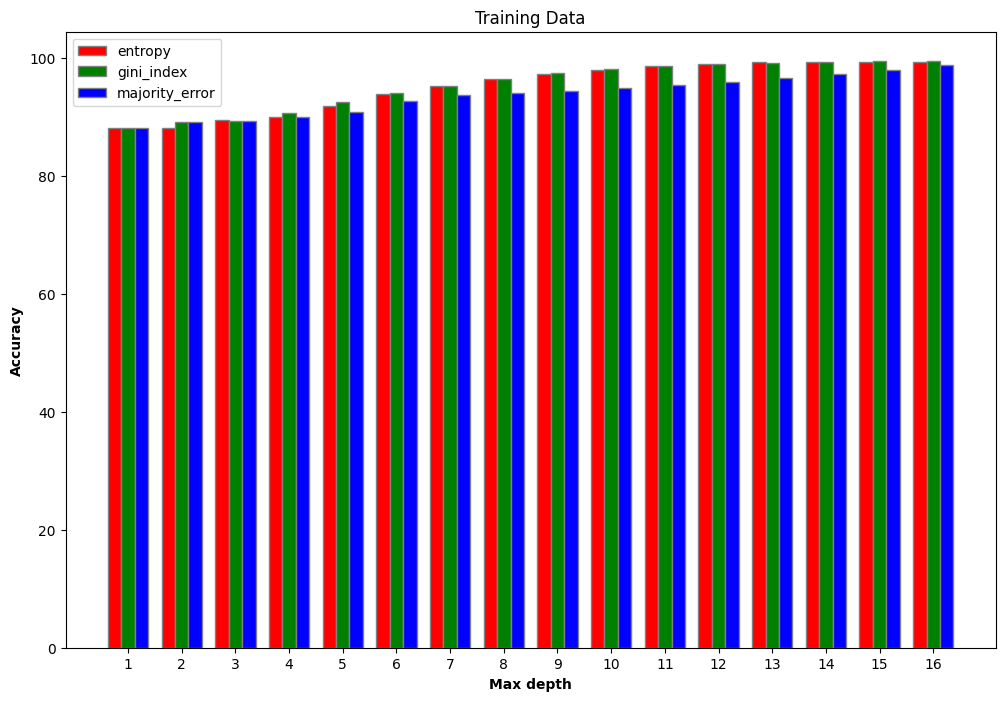

In [7]:
# set width of bar
bar_width = 0.25
fig = plt.subplots(figsize=(12, 8))

br1 = np.arange(depth_hi-depth_lo)
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, report['training']['entropy'],        color ='r', width = bar_width, edgecolor ='grey', label ='entropy')
plt.bar(br2, report['training']['gini_index'],     color ='g', width = bar_width, edgecolor ='grey', label ='gini_index')
plt.bar(br3, report['training']['majority_error'], color ='b', width = bar_width, edgecolor ='grey', label ='majority_error')

plt.xlabel('Max depth', fontweight ='bold')
plt.ylabel('Accuracy', fontweight ='bold')
plt.xticks([r + bar_width for r in range(depth_hi-depth_lo)], [_ for _ in range(depth_lo, depth_hi)])
plt.title('Training Data')

plt.legend()
plt.show()

In [8]:
pd.DataFrame.from_dict(report['test'])

,depth,entropy,gini_index,majority_error
0,1,87.52,87.52,87.52
1,2,87.52,88.34,88.34
2,3,88.86,88.58,88.66
3,4,89.30,87.78,88.34
4,5,88.28,87.78,88.10
5,6,87.18,86.98,87.50
6,7,86.78,86.40,87.40
7,8,86.36,86.02,87.22
8,9,85.70,85.18,86.76
9,10,85.02,84.52,86.34


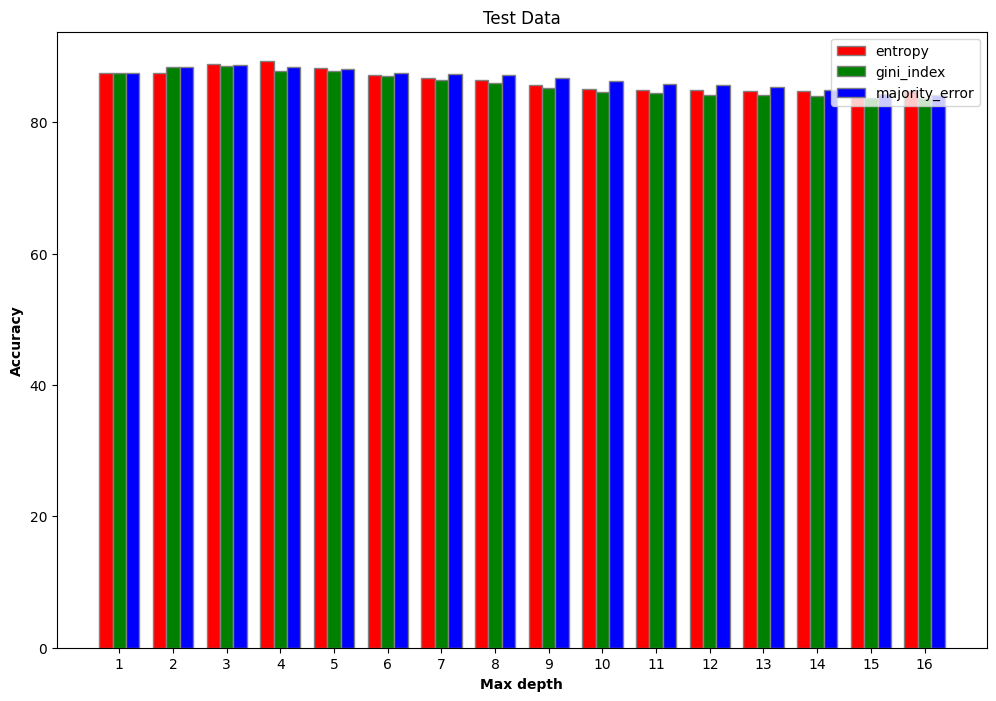

In [9]:
# set width of bar
bar_width = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(depth_hi-depth_lo)
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, report['test']['entropy'],        color ='r', width = bar_width, edgecolor ='grey', label ='entropy')
plt.bar(br2, report['test']['gini_index'],     color ='g', width = bar_width, edgecolor ='grey', label ='gini_index')
plt.bar(br3, report['test']['majority_error'], color ='b', width = bar_width, edgecolor ='grey', label ='majority_error')

plt.xlabel('Max depth', fontweight ='bold')
plt.ylabel('Accuracy', fontweight ='bold')
plt.xticks([r + bar_width for r in range(depth_hi-depth_lo)], [_ for _ in range(depth_lo, depth_hi)])
plt.title('Test Data')

plt.legend()
plt.show()

In [10]:
# update the unknowns
for attr in column_name:
    if df[attr].eq('unknown').any():
        df.loc[df[attr] == 'unknown', attr] = np.nan
        df[attr].fillna(df.groupby(attr).size().idxmax(), inplace=True)

In [12]:
# update the unknowns
for attr in column_name:
    if df_test[attr].eq('unknown').any():
        df_test.loc[df_test[attr] == 'unknown', attr] = np.nan
        df_test[attr].fillna(df_test.groupby(attr).size().idxmax(), inplace=True)

In [13]:
report = {
    'training': {
        'depth':          [],
        'entropy':        [],
        'gini_index':     [],
        'majority_error': [],
    },
    'test': {
        'depth':          [],
        'entropy':        [],
        'gini_index':     [],
        'majority_error': [],
    },
}

depth_lo, depth_hi = 1, 17

start = time.time()
for depth in range(depth_lo, depth_hi):
    report['training']['depth'].append(depth)
    report['test']['depth'].append(depth)
    for heuristic in ['entropy', 'gini_index', 'majority_error']:
        print(f'\r[{time.time() - start:.2f}s] depth = {depth}, heuristic = {heuristic:<16}', end='')
        model.fit(df, numerical_attributes=numerical_attributes, heuristic=heuristic, max_depth=depth)

        predictions = model.predict_batch(df)
        report['training'][heuristic].append((100*sum(df['label'] == predictions)/len(df)))

        predictions = model.predict_batch(df_test)
        report['test'][heuristic].append((100*sum(df_test['label'] == predictions)/len(df_test)))
print(f'Time to execute: {time.time() - start}s')

[975.56s] depth = 16, heuristic = majority_error  Time to execute: 1023.8287689685822s


In [14]:
pd.DataFrame.from_dict(report['training'])

,depth,entropy,gini_index,majority_error
0,1,88.08,88.08,88.08
1,2,88.08,89.12,89.12
2,3,89.40,89.20,89.26
3,4,89.78,90.10,90.00
4,5,91.16,91.24,90.76
5,6,92.80,92.74,91.88
6,7,94.30,94.28,92.46
7,8,95.28,95.34,92.84
8,9,96.60,96.76,93.14
9,10,97.46,97.64,93.82


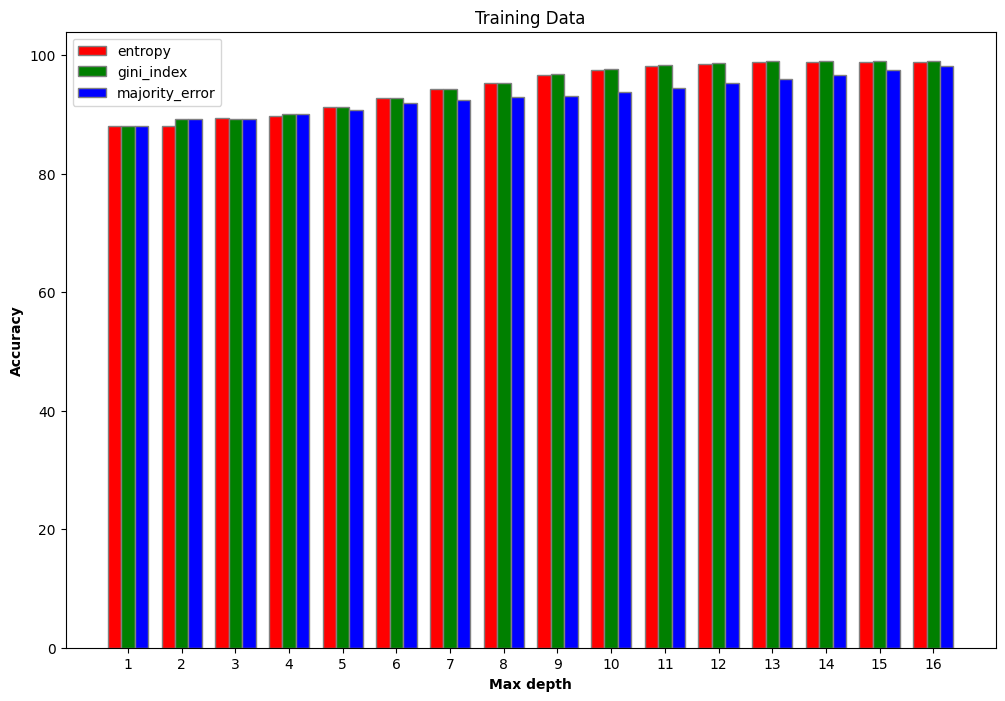

In [15]:
# set width of bar
bar_width = 0.25
fig = plt.subplots(figsize=(12, 8))

br1 = np.arange(depth_hi-depth_lo)
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, report['training']['entropy'],        color ='r', width = bar_width, edgecolor ='grey', label ='entropy')
plt.bar(br2, report['training']['gini_index'],     color ='g', width = bar_width, edgecolor ='grey', label ='gini_index')
plt.bar(br3, report['training']['majority_error'], color ='b', width = bar_width, edgecolor ='grey', label ='majority_error')

plt.xlabel('Max depth', fontweight ='bold')
plt.ylabel('Accuracy', fontweight ='bold')
plt.xticks([r + bar_width for r in range(depth_hi-depth_lo)], [_ for _ in range(depth_lo, depth_hi)])
plt.title('Training Data')

plt.legend()
plt.show()

In [16]:
pd.DataFrame.from_dict(report['test'])

,depth,entropy,gini_index,majority_error
0,1,87.52,87.52,87.52
1,2,87.52,88.34,88.34
2,3,88.86,88.42,88.52
3,4,89.12,88.40,88.62
4,5,88.26,88.22,88.30
5,6,87.56,87.46,87.94
6,7,86.62,86.48,87.90
7,8,86.30,86.16,87.60
8,9,85.56,85.18,87.62
9,10,85.24,84.86,87.02


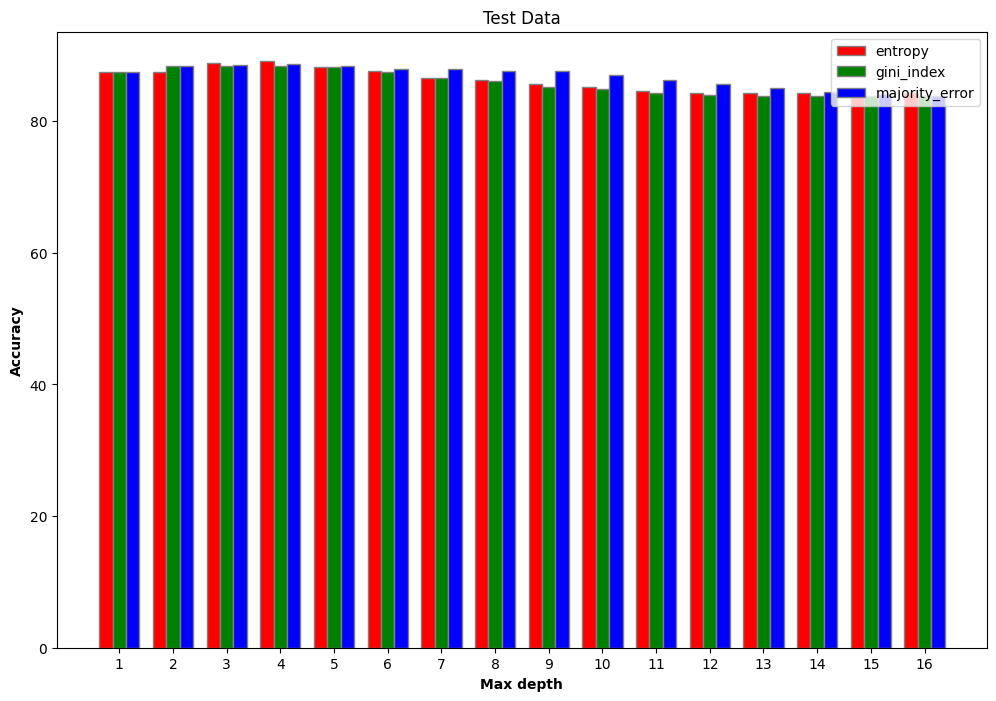

In [17]:
# set width of bar
bar_width = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(depth_hi-depth_lo)
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, report['test']['entropy'],        color ='r', width = bar_width, edgecolor ='grey', label ='entropy')
plt.bar(br2, report['test']['gini_index'],     color ='g', width = bar_width, edgecolor ='grey', label ='gini_index')
plt.bar(br3, report['test']['majority_error'], color ='b', width = bar_width, edgecolor ='grey', label ='majority_error')

plt.xlabel('Max depth', fontweight ='bold')
plt.ylabel('Accuracy', fontweight ='bold')
plt.xticks([r + bar_width for r in range(depth_hi-depth_lo)], [_ for _ in range(depth_lo, depth_hi)])
plt.title('Test Data')

plt.legend()
plt.show()